# House Prices

## Predict sale prices.
[Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

By nachogoca

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree, preprocessing
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [186]:
houses = pd.read_csv('../data/train.csv')

In [187]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [188]:
houses.shape

(1460, 81)

In [189]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Clean up

In [190]:
nan_count = pd.DataFrame(houses.isnull().sum(), columns=['count'])
nan_count.sort_values(by='count', ascending=False)

,count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


Meaning of NAs.
PoolQC: No pool.
MiscFeature: No additional feature, like tennis court or elevator.
Alley: No alley access.
Fence: No fence.
FireplaceQu: No fireplace.

## Sale prices distribution

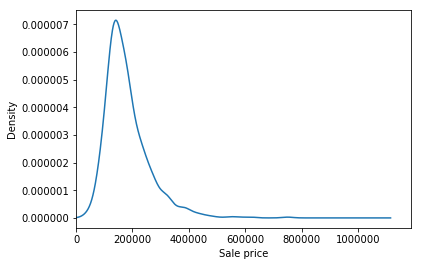

In [191]:
houses['SalePrice'].plot(kind='kde')
plt.xlim(xmin=0)
plt.xlabel('Sale price')
plt.show()

## Data preparation

In [192]:
houses = houses.drop('Id', axis=1)

In [193]:
houses = houses.drop(houses['Electrical'].isnull())

In [194]:
# Replace NA in categorical columns with string 'missing'
CATEGORICAL_LIMIT = 20
columns = houses.columns.values
for column in columns:
    is_na = houses[column].isnull().sum() > 0
    if is_na:
        unique_count = houses[column].nunique()
        if unique_count < CATEGORICAL_LIMIT:
            houses[column] = houses[column].fillna('missing')

In [195]:
is_null_numerical = houses.isnull().sum()
is_null_numerical = is_null_numerical[is_null_numerical > 0]
is_null_numerical

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [196]:
houses['LotFrontage'] = houses['LotFrontage'].fillna(0)
houses['MasVnrArea'] = houses['MasVnrArea'].fillna(0)
houses = houses.drop('GarageYrBlt', axis=1)

In [177]:
categorical_columms = houses.columns.values[houses.dtypes == 'object']
categorical_columms = np.append(categorical_columms,'MSSubClass')

In [229]:
houses.reset_index(drop=True, inplace=True)

houses_dummy = houses.copy(deep=True)

binarizer = preprocessing.LabelBinarizer()
for column in categorical_columms:
    dummy_category = pd.DataFrame(binarizer.fit_transform(houses_dummy[column]))
    houses_dummy.drop(column, axis=1, inplace=True)
    houses_dummy = pd.concat([houses_dummy, dummy_category], axis=1)
    #houses_dummy = houses_dummy.merge(dummy_category)

In [230]:
houses_dummy.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,5,6,7,8,9,10,11,12,13,14
0,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,1,0,0,0,0,0,0,0,0,0
1,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,1,0,0,0,0,0,0,0,0
2,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,1,0,0,0,0,0,0,0,0,0
3,85.0,14115,5,5,1993,1995,0.0,732,0,64,...,0,0,0,0,0,0,0,0,0,0
4,75.0,10084,8,5,2004,2005,186.0,1369,0,317,...,0,0,0,0,0,0,0,0,0,0


## Experiment preparation

In [231]:
X = houses_dummy.drop(['SalePrice'],axis=1)
y = houses_dummy['SalePrice']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=1)
    
X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=1)

## Decision Tree
http://scikit-learn.org/stable/modules/tree.html

In [249]:
regr = tree.DecisionTreeRegressor()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.76279621431984057

In [258]:
test = pd.read_csv('../data/test.csv')

In [259]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal
